In [1]:
import tensorflow as tf
from keras_flops import get_flops

# Define a simple model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Calculate FLOPS
flops = get_flops(model, batch_size=1)
print(f"FLOPS: {flops / 10**6:.03f} M")

# Assuming a hypothetical number of cycles per operation
cycles_per_operation = 2  # This is a placeholder value

# Calculate MPIPS (Million Instructions Per Second)
mpips = flops / 10**6 / (cycles_per_operation * 1e-6)  # Convert to MPIPS
print(f"MPIPS: {mpips:.03f} M")

# Calculate CPI (Cycles Per Instruction)
# Assuming total instructions are equal to FLOPS for simplicity
cpi = cycles_per_operation  # This is a placeholder value
print(f"CPI: {cpi:.03f}")

Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
FLOPS: 3.459 M
MPIPS: 1729374.000 M
CPI: 2.000


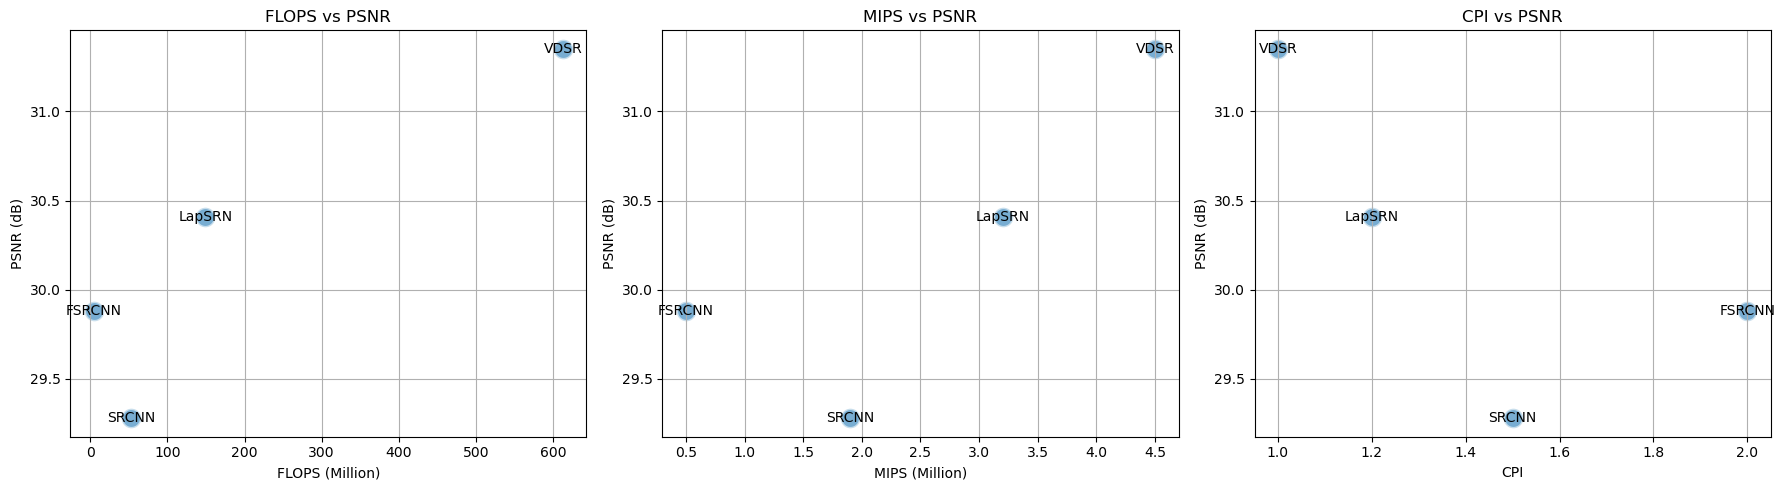

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Model performance data
models = ['SRCNN', 'FSRCNN', 'VDSR', 'LapSRN']
flops = [52.6, 4.6, 612.6, 149.4]  # FLOPS in millions
mips = [1.9, 0.5, 4.5, 3.2]        # MIPS in millions
psnr = [29.28, 29.88, 31.35, 30.41]  # PSNR in dB
cpi = [1.5, 2.0, 1.0, 1.2]          # CPI values (example data)

# Create figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# FLOPS vs PSNR bubble chart
scatter1 = ax1.scatter(flops, psnr, s=200, alpha=0.6, edgecolors="w", linewidth=2)
for i, txt in enumerate(models):
    ax1.annotate(txt, (flops[i], psnr[i]), fontsize=10, ha='center', va='center')
ax1.set_xlabel('FLOPS (Million)')
ax1.set_ylabel('PSNR (dB)')
ax1.set_title('FLOPS vs PSNR')
ax1.grid()

# MIPS vs PSNR bubble chart 
scatter2 = ax2.scatter(mips, psnr, s=200, alpha=0.6, edgecolors="w", linewidth=2)
for i, txt in enumerate(models):
    ax2.annotate(txt, (mips[i], psnr[i]), fontsize=10, ha='center', va='center')
ax2.set_xlabel('MIPS (Million)')
ax2.set_ylabel('PSNR (dB)')
ax2.set_title('MIPS vs PSNR')
ax2.grid()

# CPI vs PSNR bubble chart
scatter3 = ax3.scatter(cpi, psnr, s=200, alpha=0.6, edgecolors="w", linewidth=2)
for i, txt in enumerate(models):
    ax3.annotate(txt, (cpi[i], psnr[i]), fontsize=10, ha='center', va='center')
ax3.set_xlabel('CPI')
ax3.set_ylabel('PSNR (dB)')
ax3.set_title('CPI vs PSNR')
ax3.grid()

# Adjust layout and show plot
plt.tight_layout()
plt.show()